<a href="https://colab.research.google.com/github/Pratt33/ML_Algorithms_From_Scratch/blob/main/Knn_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Objective

The goal is to classify data points based on their similarity to known labeled instances using k-Nearest Neighbors (k-NN).

This can be applied to various classification tasks such as customer segmentation, medical diagnosis, or fraud detection.

# Problem Statement

Implementing a k-NN classifier that can accurately predict labels for new data points based on the k closest neighbors in the training set.

# Business Constraints

- Predictions should be interpretable and explainable.

- The algorithm should be efficient for small to medium-sized datasets.

- Model performance should be evaluated using accuracy.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

In [2]:
class MyKNN:
    def __init__(self, k=5):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X_test):
        y_pred = []
        for i in X_test:
            distances = [self.calculate_distance(i, j) for j in self.X_train]
            neighbors = sorted(enumerate(distances), key=lambda x: x[1])[:self.k]
            label = self.majority_count(neighbors)
            y_pred.append(label)
        return np.array(y_pred)

    def majority_count(self, neighbors):
        votes = [self.y_train[i[0]] for i in neighbors]
        return Counter(votes).most_common(1)[0][0]

    def calculate_distance(self, point_A, point_B):
        return np.linalg.norm(point_A - point_B)

In [3]:
# Load Dataset
dataset = load_iris()
X = dataset.data[:, :2]  # Using only the first two features for visualization
y = dataset.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Train Model
model = MyKNN(k=4)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [6]:
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 86.67%


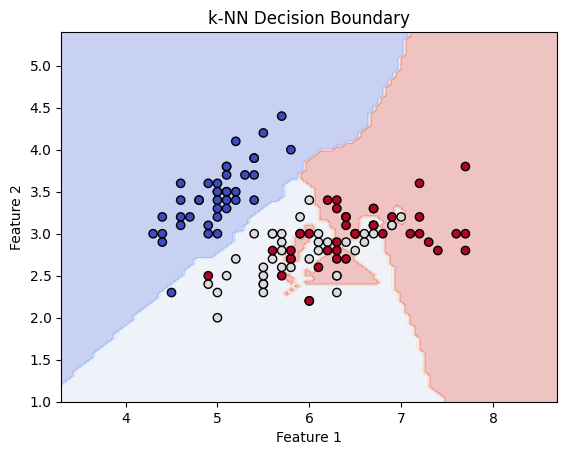

In [7]:
# Plot Decision Boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Predict on each point in the mesh grid
    grid_data = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid_data)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('k-NN Decision Boundary')
    plt.show()

plot_decision_boundary(model, X_train, y_train)

# Conclusion

The k-NN model provides a simple yet effective way to classify data points. It achieved an accuracy of around 86.67% on the Iris dataset.